In [1]:
#Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import os
import json

In [2]:
#Import Dependencies
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
#Import Flask
from flask import Flask

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
import os
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
from sqlalchemy.ext.declarative import declarative_base

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

# Define the directory and database filename separately
# directory = "/Users/marvinalarry/Documents/Education/Tulsa Community College/Data Visualization/Homework/Challenge #10 - Grade_WIP/sqlalchemy-challengeMarvinaLarry/Surfsup/Resources"
# db_filename = "hawaii.sqlite"

# # Combine them to create the full database file path
# db_file_path = os.path.join(directory, db_filename)

# # Create an SQLAlchemy engine object
# engine = create_engine(f"sqlite:///{db_file_path}")

In [6]:
# Check if the file exists
# if os.path.exists(db_file_path):
#     print(f"The file {db_filename} exists at the path {db_file_path}.")
# else:
#     print(f"The file {db_filename} does not exist at the path {db_file_path}.")

In [7]:
#print(os.getcwd())

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [9]:
# Collect the names of tables within the database
table = inspector.get_table_names()
table

['measurement', 'station']

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
# class_names = Base.classes.keys()
# print(class_names)
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
#find_recent_date = session.query(func.max(measurements.date)).first()
find_recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
find_recent_date

('2017-08-23',)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
last_date_PY = dt.date(2017,8,23)- dt.timedelta(days = 365)
#print(last_date_PY)

# Perform a query to retrieve the date and precipitation scores
retrieve_QRY = session.query(measurements.date, measurements.prcp).filter(measurements.date >= last_date_PY).all()
#print(retrieve_QRY)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
pdate_df = pd.DataFrame(retrieve_QRY, columns = ["date", "precipitation"])

# Sort the dataframe by date
sorted_df = pdate_df.sort_values("date")
#print(sorted_df)

In [16]:
# Convert the DataFrame to a dictionary
date_dict = sorted_df.to_dict(orient='records')
#date_dict
# Save the dictionary as a JSON file
with open("date_dict.json", "w") as json_file:
    json.dump(date_dict, json_file)

Text(0, 0.5, 'inches')

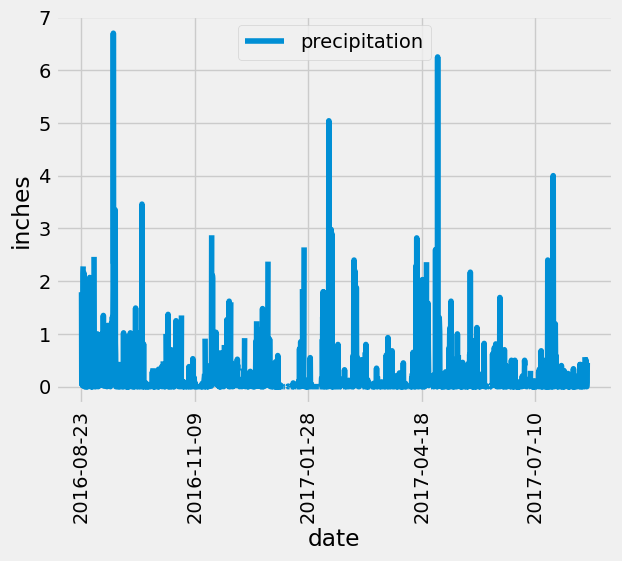

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(x="date", y="precipitation",rot=90)
plt.ylabel("inches")

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
station_count_QRY = session.query(func.count(stations.station)).all()
#station_count_QRY

In [19]:
# select station_name, count(station_name) from measurements
# group by station_name
# order by 2

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_QRY = session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
active_station_QRY

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
HiLowAvg = session.query(func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).filter(measurements.station == "USC00519281").all()
HiLowAvg

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

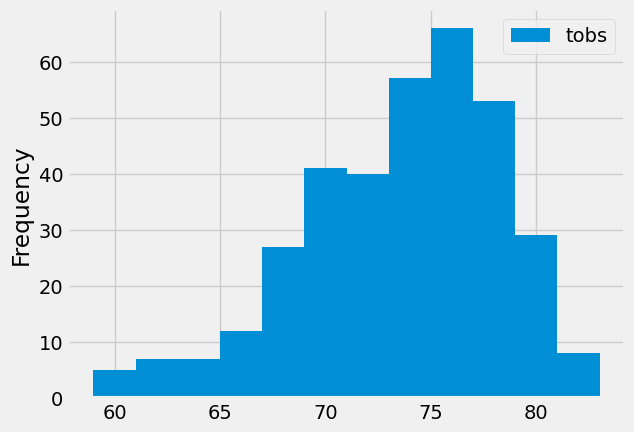

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12tobs_QRY = session.query(measurements.tobs).filter(measurements.station == "USC00519281").filter(measurements.date >= last_date_PY).all()
last12tobs_QRY

tempsdata_df = pd.DataFrame(last12tobs_QRY, columns = ["tobs"])
tempsdata_df.plot(kind = "hist", bins = 12)

In [23]:
# Convert the DataFrame to a dictionary
tobs_dict = tempsdata_df.to_dict(orient='records')

# Save the dictionary as a JSON file
with open("tobs_dict.json", "w") as json_file:
    json.dump(tobs_dict, json_file)

# Close Session

In [24]:
# Close Session
session.close()